In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
import scipy.io
import pandas as pd
from IPython.display import display, clear_output
import sys, os
import warnings


warnings.filterwarnings('ignore')
from sklearn.mixture import GaussianMixture

import itertools

from sklearn.cluster import SpectralClustering, AffinityPropagation
import sklearn
%matplotlib inline

In [1]:
from numba import jit

Generate mixture of kappa/Gaussian distributions (k=2 kappa, k=200 Gaussian)

4


200.0
200.0
200.0
200.0
[4.198395528306428, 8.584885157254941, 1.0437599008968137]
[4.640517035932032, 6.029067180961075, 3.1937072076162516]
[7.402283925545539, 7.523668660111312, 2.810118128920594]
[7.45965306969659, 6.837975199590256, 5.452016530662609]
[2.029507002248267, 1.9771362438361189, 1.9847269891958796]
[2.0082706538781485, 2.0088843787685438, 2.0174372910849065]
[1.9786415665417396, 1.9776527458033633, 2.0557624073880705]
[2.032094008515468, 2.032700530276697, 1.9766439492014012]


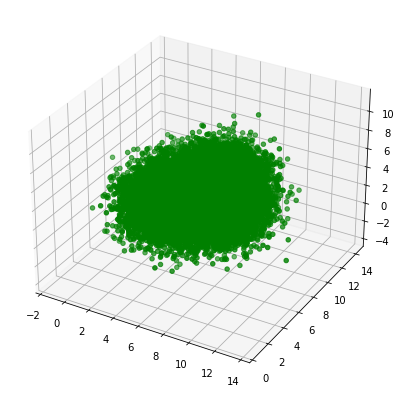

In [22]:
Np=10000 #Amount of particles
from random import randint
import random
k_kappa_min=200
k_kappa_max=200   #k_kappa=2 for kappa distribution - k_kappa=200 for full gaussian
NC=4  #Amount of clusters
b=9
v0x=b*np.random.rand(NC) #change value in front of random array to change the shift in that direction
v0y=b*np.random.rand(NC)
v0z=b*np.random.rand(NC)
vpkx=[]
vpky=[] 
vpkz=[]
for ncomp in range(0,NC):
#     a=randint(4,4)
#     b=randint(4,4)
#     c=randint(10,10)
#     v0x=a*np.random.rand(NC) #change value in front of random array to change the shift in that direction
#     v0y=b*np.random.rand(NC)
#     v0z=c*np.random.rand(NC)
    
    k_kappa=random.uniform(k_kappa_min, k_kappa_max)
#     k_kappa=2.5
    print(k_kappa)
    uth=random.uniform(2,2)
    vth=random.uniform(2,2)
    apar = uth*2.0*(k_kappa-1.5)/k_kappa
    aperp = vth*2.0*(k_kappa-1.5)/k_kappa

#     uth=np.sqrt(2)
#     vth=np.sqrt(2)
#     apar = uth*uth*2.0*(k_kappa-1.5)/k_kappa
#     aperp = vth*vth*2.0*(k_kappa-1.5)/k_kappa
    
    theta = 2.0 * np.pi * np.random.rand(Np)
    vpar=np.sqrt(k_kappa*apar*(pow(np.random.rand(Np),(-1.0/(k_kappa-0.5)))-1.0))*np.cos(theta)
    vperp=np.sqrt(k_kappa*aperp*(1.0+vpar*vpar/(k_kappa*apar+1e-10))*(pow((1.0-np.random.rand(Np)),(-1.0/k_kappa))-1.0))

    theta = 2*np.pi*np.random.rand(Np)
    vpkx2=v0x[ncomp]+vpar
    vpky2=v0y[ncomp]+vperp * np.cos(theta)
    vpkz2=v0z[ncomp]+vperp * np.sin(theta)
    
    vpkx.append(vpkx2)
    vpky.append(vpky2)
    vpkz.append(vpkz2)

    

vpkx = list(np.concatenate(vpkx). flat)
vpky = list(np.concatenate(vpky). flat)
vpkz = list(np.concatenate(vpkz). flat)   
Xdata=np.array([vpkx,vpky,vpkz])

Xdata=np.conjugate(Xdata).T  
#print(Xdata.shape)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(Xdata[:,0], Xdata[:,1], Xdata[:,2], color = "green")
# Means of 4 clusters
print([np.mean(Xdata[:Np,0]),np.mean(Xdata[:Np,1]),np.mean(Xdata[:Np,2])])
print([np.mean(Xdata[Np:2*Np,0]),np.mean(Xdata[Np:2*Np,1]),np.mean(Xdata[Np:2*Np,2])])
print([np.mean(Xdata[2*Np:3*Np,0]),np.mean(Xdata[2*Np:3*Np,1]),np.mean(Xdata[2*Np:3*Np,2])])
print([np.mean(Xdata[3*Np:,0]),np.mean(Xdata[3*Np:,1]),np.mean(Xdata[3*Np:,2])])
#variances of 4 clusters
print([np.mean(np.abs(Xdata[:Np,0]-np.mean(Xdata[:Np,0]))**2),np.mean(np.abs(Xdata[:Np,1]-np.mean(Xdata[:Np,1]))**2),np.mean(np.abs(Xdata[:Np,2]-np.mean(Xdata[:Np,2]))**2)])
print([np.mean(np.abs(Xdata[Np:2*Np,0]-np.mean(Xdata[Np:2*Np,0]))**2),np.mean(np.abs(Xdata[Np:2*Np,1]-np.mean(Xdata[Np:2*Np,1]))**2),np.mean(np.abs(Xdata[Np:2*Np,2]-np.mean(Xdata[Np:2*Np,2]))**2)])
print([np.mean(np.abs(Xdata[2*Np:3*Np,0]-np.mean(Xdata[2*Np:3*Np,0]))**2),np.mean(np.abs(Xdata[2*Np:3*Np,1]-np.mean(Xdata[2*Np:3*Np,1]))**2),np.mean(np.abs(Xdata[2*Np:3*Np,2]-np.mean(Xdata[2*Np:3*Np,2]))**2)])
print([np.mean(np.abs(Xdata[3*Np:,0]-np.mean(Xdata[3*Np:,0]))**2),np.mean(np.abs(Xdata[3*Np:,1]-np.mean(Xdata[3*Np:,1]))**2),np.mean(np.abs(Xdata[3*Np:,2]-np.mean(Xdata[3*Np:,2]))**2)])
# show plot
plt.show()

GMM silhouette and CH score (slow)

In [452]:
# fig.clear()


# Sil_Score=[]
# CH_score=[]
# n_components_range= range(2,10)
# clusters=list(range(2,10))

# for n_components in range(2,10):
#     gmm = GaussianMixture(n_components,n_init=20, random_state=0)
#     labels=gmm.fit_predict(Xdata)
#     Sil_Score.append(sklearn.metrics.silhouette_score(Xdata,labels))
#     CH_score.append(sklearn.metrics.calinski_harabasz_score(Xdata,labels))
# plt.rcParams['figure.figsize'] = [10, 2]    
  
# plt.subplot(1, 2, 1)
# plt.plot(clusters,Sil_Score,'-o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette-score')


# plt.subplot(1, 2, 2) # index 2

# plt.plot(clusters,CH_score,'-o','r')
# plt.xlabel('Number of clusters')
# plt.ylabel('Calinski-Harabasz-score')

GMM BIC (fast)

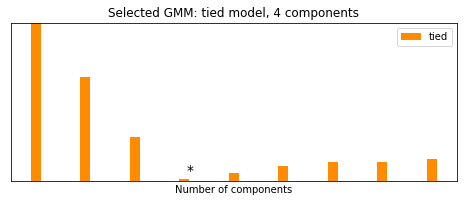

In [23]:
fig.clear()

lowest_bic = np.infty
bic= []
n_components_range= range(1,10)
cv_types = ["tied"]

for cv_type in cv_types:
    for n_components in n_components_range:
    
        gmm = GaussianMixture(n_components,covariance_type=cv_type, random_state=0).fit(Xdata)

        bic.append(gmm.bic(Xdata))
        if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(["darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

plt.xticks(())
plt.yticks(())
plt.title(
    f"Selected GMM: {best_gmm.covariance_type} model, "
    f"{best_gmm.n_components} components"
)
plt.subplots_adjust(hspace=0.35, bottom=0.02)
plt.show()

[4.188063371827878, 8.57876183567126, 1.0053297343479934]
[7.4924314416435305, 6.826096612906706, 5.506020650301775]
[7.361548068265456, 7.561050408590674, 2.7178145468582438]
[4.660602667085975, 6.010584663634222, 3.2532856417388136]
[array([2.02204553, 1.98132864, 1.91285392]), array([2.02146613, 2.08815079, 1.8370678 ]), array([2.01215435, 1.92422144, 1.82075938]), array([2.01914168, 1.93821863, 1.91610281])]


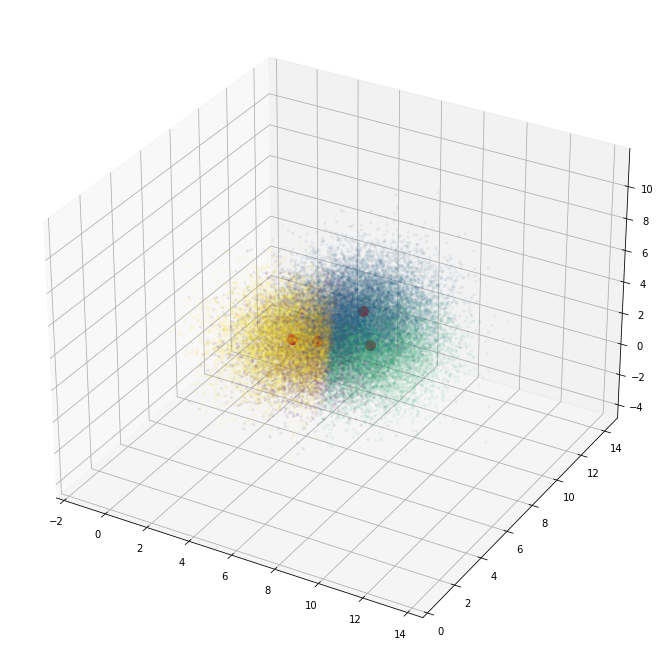

In [24]:
fig.clear()

my_model = GaussianMixture(n_components=best_gmm.n_components,random_state=0,covariance_type='full')
my_model.fit(Xdata)

gmm_labels = my_model.predict(Xdata)
gmm_centers = my_model.means_
gmm_labels.shape

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vpkx,vpky,vpkz,marker='.', c=gmm_labels,alpha=0.05)
print([gmm_centers[0,0],gmm_centers[0,1],gmm_centers[0,2]])
print([gmm_centers[1,0],gmm_centers[1,1],gmm_centers[1,2]])
print([gmm_centers[2,0],gmm_centers[2,1],gmm_centers[2,2]])
print([gmm_centers[3,0],gmm_centers[3,1],gmm_centers[3,2]])

cov=my_model.covariances_
print([np.diag(cov[i]) for i in range(0,4)])

for i in range(0,best_gmm.n_components):
    ax.plot(gmm_centers[i,0],gmm_centers[i,1],gmm_centers[i,2],'o', color='red',markersize='10')

# for angle in range(0, 360, 40):
#     ax.view_init(5, angle)
#     display(fig)
#     clear_output(wait = True)
#     plt.pause(0.1)

Spectral

259.73647475242615

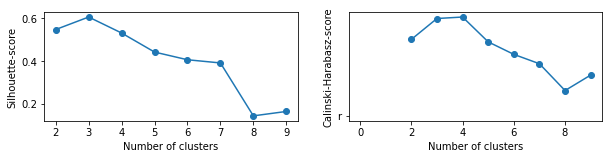

In [539]:
fig.clear()
import time 
from sklearn.cluster import SpectralClustering
t= time.time()
Sil_Score=[]
CH_score=[]
clusters=list(range(2,10))

for i in range(2,10):
    clustering = SpectralClustering(n_clusters=i,
         assign_labels='discretize', 
        random_state=0,affinity='nearest_neighbors',n_jobs=-1).fit(Xdata)
    Sil_Score.append(sklearn.metrics.silhouette_score(Xdata,clustering.labels_))
    CH_score.append(sklearn.metrics.calinski_harabasz_score(Xdata,clustering.labels_))
plt.rcParams['figure.figsize'] = [10, 2]    
  
plt.subplot(1, 2, 1)
plt.plot(clusters,Sil_Score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette-score')


plt.subplot(1, 2, 2) # index 2

plt.plot(clusters,CH_score,'-o','r')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz-score')
elapsed=time.time()-t
elapsed